<a href="https://colab.research.google.com/github/aqualytics/INFT6201-Assignment3/blob/main/INFT6201_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load data
# ny = pd.read_csv('ny_accidents.csv')

In [3]:
# Import data for Google Collab. Remove before submission
url = 'https://raw.githubusercontent.com/aqualytics/INFT6201-Assignment3/main/ny_accidents.csv?token=GHSAT0AAAAAABZNNFLGDHXVZMJZZRLCVUMQYZXUG3Q'
ny = pd.read_csv(url)

In [4]:
# Convert dates & times to datetime
cols = ['Start_Time','End_Time','Weather_Timestamp']
ny[cols] = ny[cols].apply(pd.to_datetime, errors='coerce')

# List variables and data types
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39537 entries, 0 to 39536
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             39537 non-null  int64         
 1   ID                     39537 non-null  object        
 2   Severity               39537 non-null  int64         
 3   Start_Time             39537 non-null  datetime64[ns]
 4   End_Time               39537 non-null  datetime64[ns]
 5   Start_Lat              39537 non-null  float64       
 6   Start_Lng              39537 non-null  float64       
 7   End_Lat                39537 non-null  float64       
 8   End_Lng                39537 non-null  float64       
 9   Distance.mi.           39537 non-null  float64       
 10  Description            39537 non-null  object        
 11  Number                 11845 non-null  float64       
 12  Street                 39537 non-null  object        
 13  S

In [5]:
# Describe the data
ny.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Number,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Speed.mph.,Precipitation.in.
count,3.953700e+04,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,11845.000000,39147.000000,38074.000000,39137.000000,39162.000000,39131.000000,38349.000000,37594.000000
mean,7.543609e+05,2.282900,41.714567,-74.806364,41.715110,-74.806824,0.654307,2133.770030,51.915442,49.177806,65.716253,29.713701,9.040011,9.132535,0.005389
std,3.307301e+05,0.642619,1.065492,1.685198,1.065188,1.685823,1.551176,3428.535678,16.787521,19.667776,20.599997,0.399174,2.668705,5.870588,0.027952
min,2.373510e+05,1.000000,40.523980,-79.748951,40.524638,-79.761920,0.000000,1.000000,-12.000000,-30.400000,13.000000,27.550000,0.000000,0.000000,0.000000
25%,4.998200e+05,2.000000,40.772600,-76.049410,40.774311,-76.047636,0.000000,215.000000,39.900000,34.000000,49.000000,29.470000,10.000000,5.000000,0.000000
50%,7.266940e+05,2.000000,41.065783,-73.929060,41.068520,-73.929030,0.192000,857.000000,51.000000,51.000000,67.000000,29.740000,10.000000,8.000000,0.000000
75%,9.178200e+05,2.000000,42.989290,-73.781207,42.987950,-73.781337,0.687000,2451.000000,65.000000,65.000000,84.000000,29.990000,10.000000,13.000000,0.000000
max,1.515693e+06,4.000000,44.917460,-71.943680,44.981057,-71.943680,49.240000,52027.000000,96.000000,96.000000,100.000000,30.710000,20.000000,40.000000,0.830000


Text(0.5, 1.0, 'Correlation Heatmap')

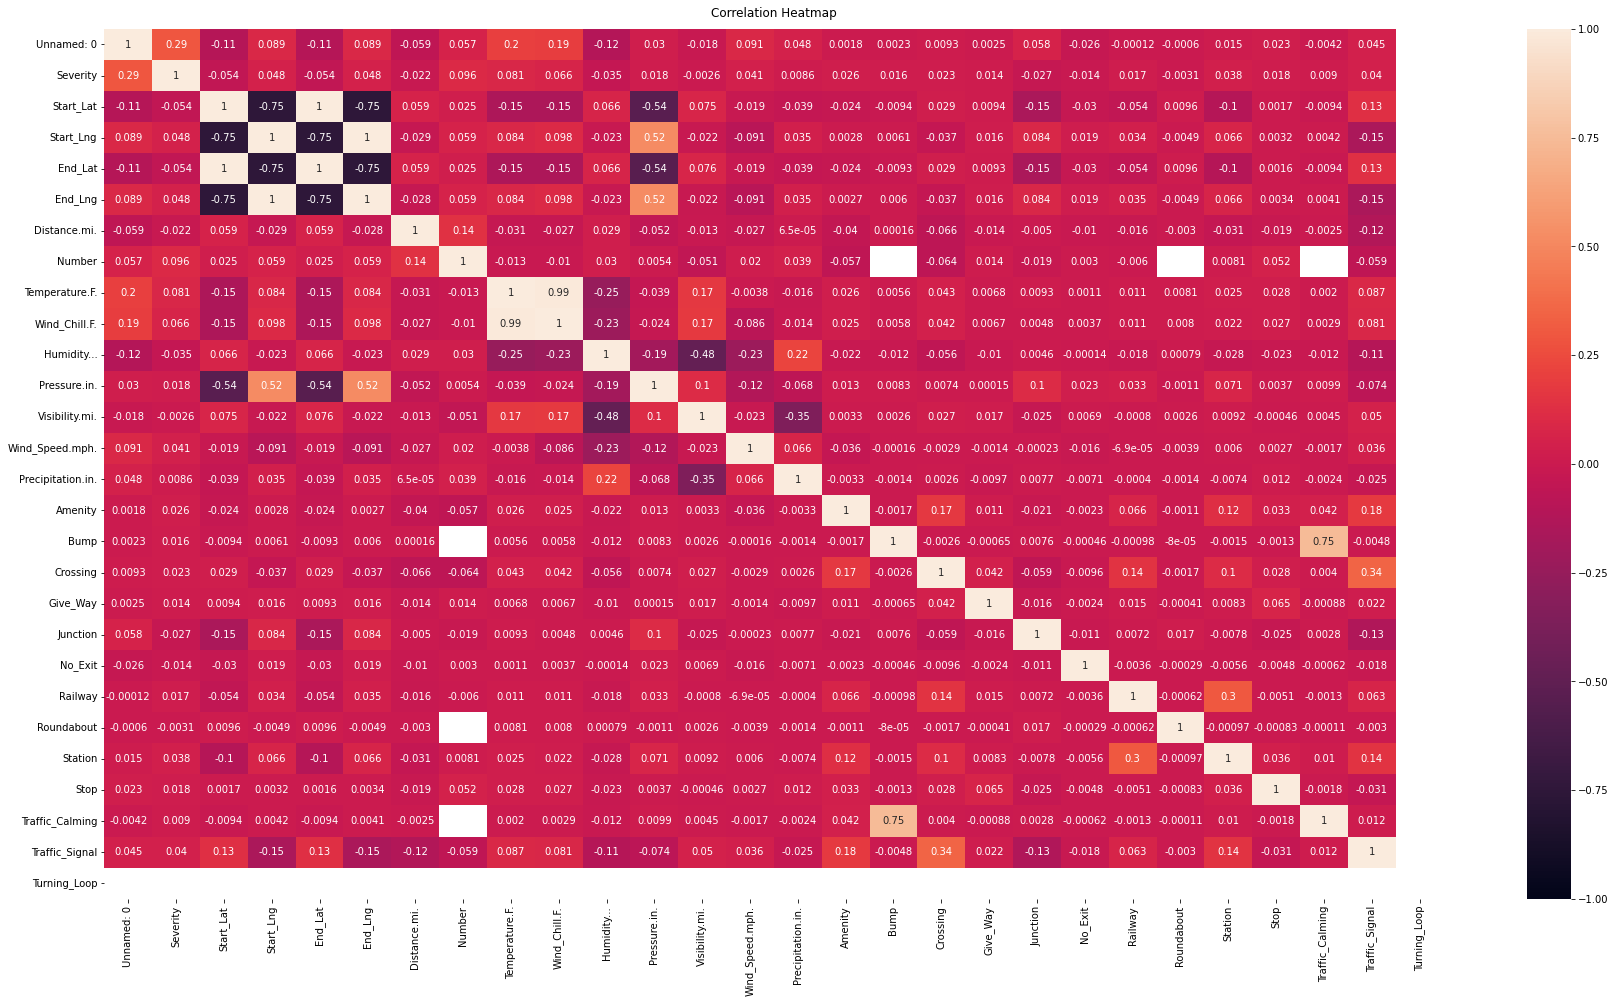

In [6]:
# Correlation heatmap of variables
#plt.figure(figsize=(16, 16))
plt.rcParams['figure.figsize']=(30,16)
heatmap = sns.heatmap(ny.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


[Text(0, 0, '6251'),
 Text(0, 0, '6423'),
 Text(0, 0, '6224'),
 Text(0, 0, '7144'),
 Text(0, 0, '6523'),
 Text(0, 0, '3644'),
 Text(0, 0, '3328')]

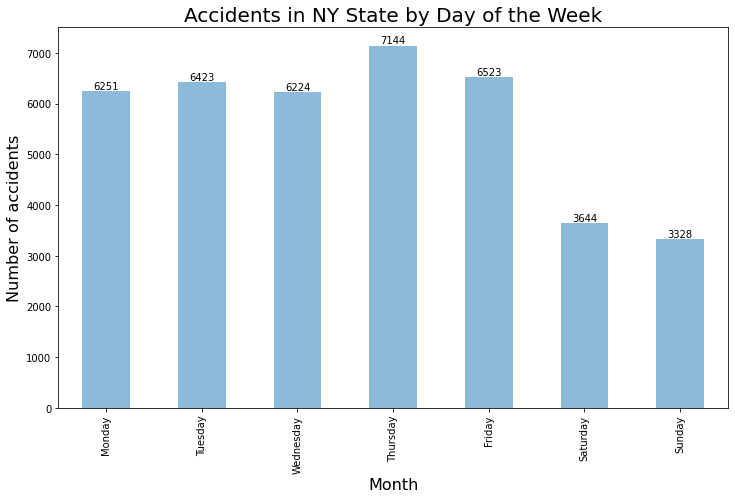

In [11]:
# Accident time
import calendar

# Number of accident per day of the week
accidents_day = ny.groupby(ny['Start_Time'].dt.dayofweek).count().Start_Time

# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
fig, ax = plt.subplots()
ax = accidents_day.plot(kind='bar',figsize=(12,7), alpha=0.5)
ax.set_title('Accidents in NY State by Day of the Week', fontsize=20)
ax.set_xlabel('Month',fontsize=16)
ax.set_ylabel('Number of accidents',fontsize=16)
ax.bar_label(ax.containers[0], label_type='edge', padding=10)



[Text(0, 0, '1037'),
 Text(0, 0, '1576'),
 Text(0, 0, '2322'),
 Text(0, 0, '4301'),
 Text(0, 0, '4083'),
 Text(0, 0, '4262'),
 Text(0, 0, '763'),
 Text(0, 0, '596'),
 Text(0, 0, '3117'),
 Text(0, 0, '4842'),
 Text(0, 0, '5872'),
 Text(0, 0, '6766')]

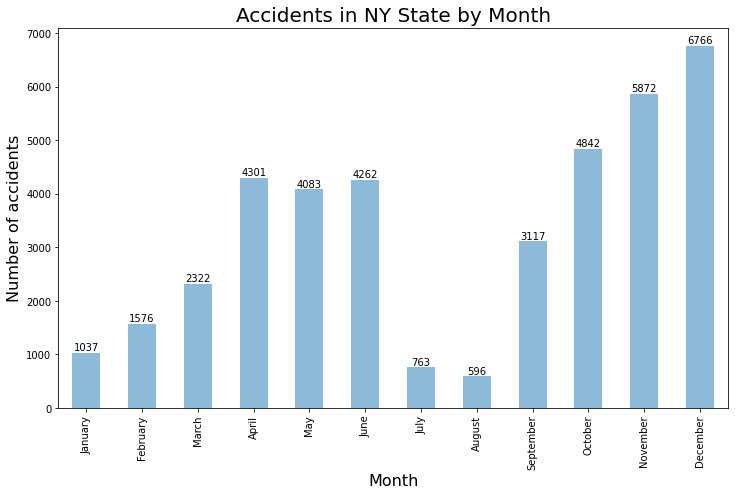

In [10]:
# Number of accident per month
accidents_month = ny.groupby(ny['Start_Time'].dt.month).count().Start_Time

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

# plot accidents per month
fig, ax = plt.subplots()
ax = accidents_month.plot(kind='bar',figsize=(12,7), alpha=0.5)
ax.set_title('Accidents in NY State by Month', fontsize=20)
ax.set_xlabel('Month',fontsize=16)
ax.set_ylabel('Number of accidents',fontsize=16)
ax.bar_label(ax.containers[0], label_type='edge', padding=10)

[Text(0, 10, '1566'),
 Text(0, 10, '1416'),
 Text(0, 10, '1126'),
 Text(0, 10, '942'),
 Text(0, 10, '934'),
 Text(0, 10, '1143'),
 Text(0, 10, '1608'),
 Text(0, 10, '1520'),
 Text(0, 10, '1554'),
 Text(0, 10, '1356'),
 Text(0, 10, '1243'),
 Text(0, 10, '1341'),
 Text(0, 10, '1822'),
 Text(0, 10, '2245'),
 Text(0, 10, '2467'),
 Text(0, 10, '2663'),
 Text(0, 10, '2710'),
 Text(0, 10, '2628'),
 Text(0, 10, '1962'),
 Text(0, 10, '1600'),
 Text(0, 10, '1519'),
 Text(0, 10, '1381'),
 Text(0, 10, '1359'),
 Text(0, 10, '1432')]

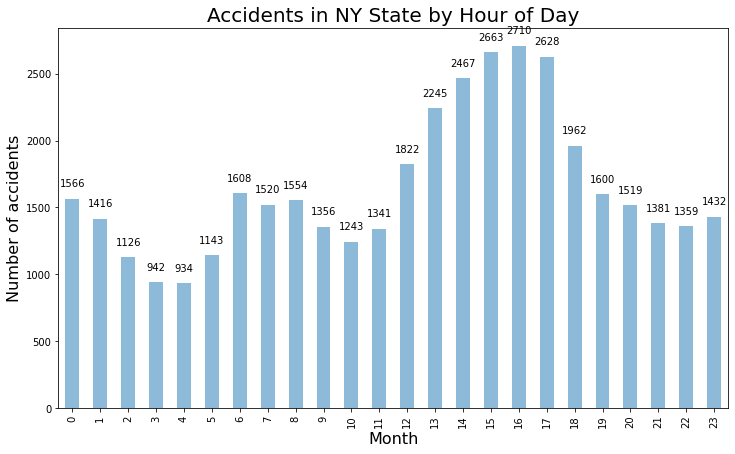

In [22]:
# Number of accident per hour
accidents_hour = ny.groupby(ny['Start_Time'].dt.hour).count().Start_Time

# plot accidents per hour
fig, ax = plt.subplots()
ax = accidents_hour.plot(kind='bar',figsize=(12,7), alpha=0.5)
ax.set_title('Accidents in NY State by Hour of Day', fontsize=20)
ax.set_xlabel('Month',fontsize=16)
ax.set_ylabel('Number of accidents',fontsize=16)
ax.bar_label(ax.containers[0], label_type='edge', padding=10)

In [ ]:
# Accident location
# Geographic location


In [ ]:
# Look at factors which influence severity of road raffic accidents??